In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/car_price_prediction.csv')
data.shape



(19237, 18)

In [ ]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:

# First
X = data.drop('Price' , axis = 1)
Y = data['Price']
# Encode
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output = False)
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_encoded = pd.DataFrame(X_encoded, columns = encoded_cols, index = X.index )

# concatanation
X = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)
print(X, Y)

             ID  Prod. year  Cylinders  Airbags  Levy_-  Levy_1011  Levy_1016  \
0      45654403        2010        6.0       12     0.0        0.0        0.0   
1      44731507        2011        6.0        8     0.0        0.0        0.0   
2      45774419        2006        4.0        2     1.0        0.0        0.0   
3      45769185        2011        4.0        0     0.0        0.0        0.0   
4      45809263        2014        4.0        4     0.0        0.0        0.0   
...         ...         ...        ...      ...     ...        ...        ...   
19232  45798355        1999        4.0        5     1.0        0.0        0.0   
19233  45778856        2011        4.0        8     0.0        0.0        0.0   
19234  45804997        2010        4.0        4     0.0        0.0        0.0   
19235  45793526        2007        4.0        4     0.0        0.0        0.0   
19236  45813273        2012        4.0       12     0.0        0.0        0.0   

       Levy_1017  Levy_1018

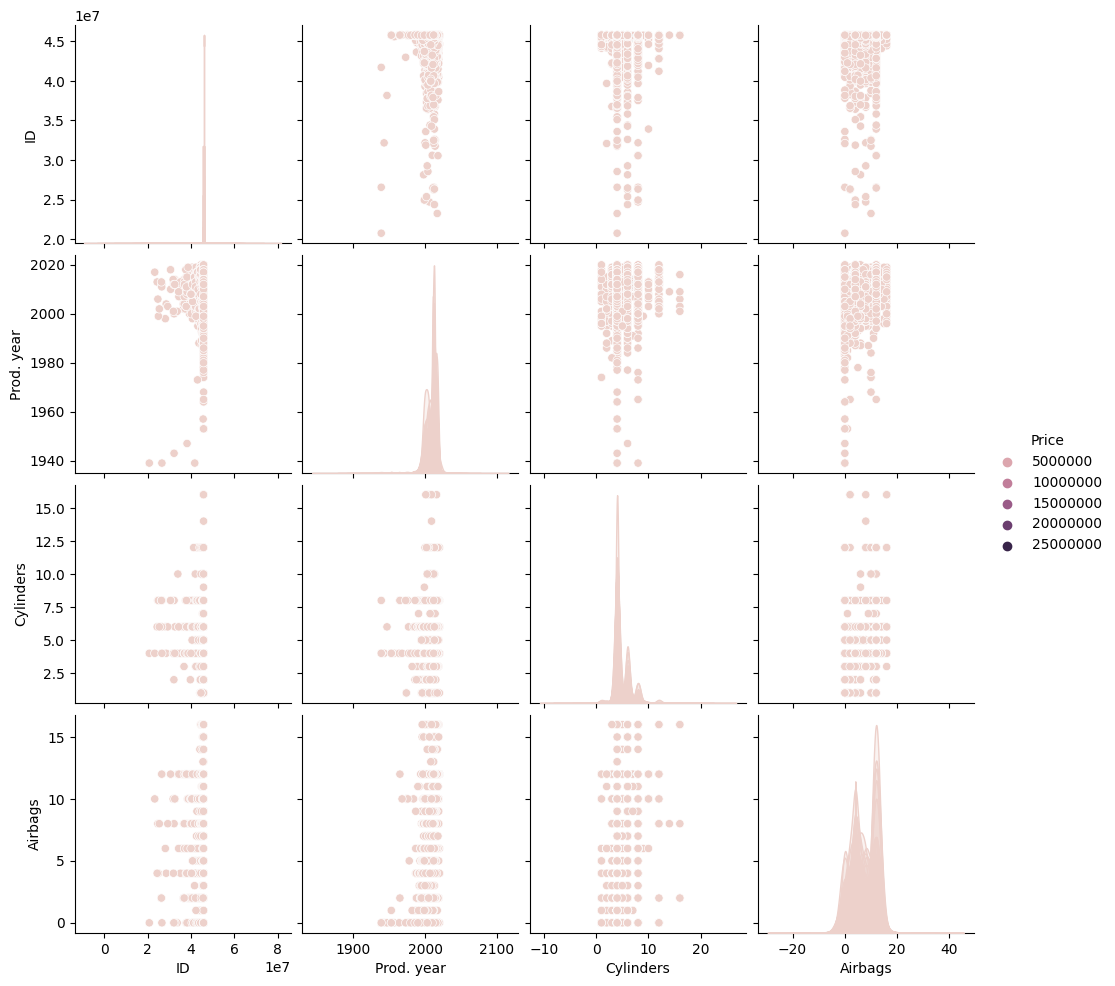

<Figure size 1200x800 with 0 Axes>

In [ ]:
sns.pairplot(data, hue = 'Price')
plt.figure(figsize = (12, 8))
plt.show()

<ipython-input-107-e7ea44954603>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.drop('Category', axis=1).corr()


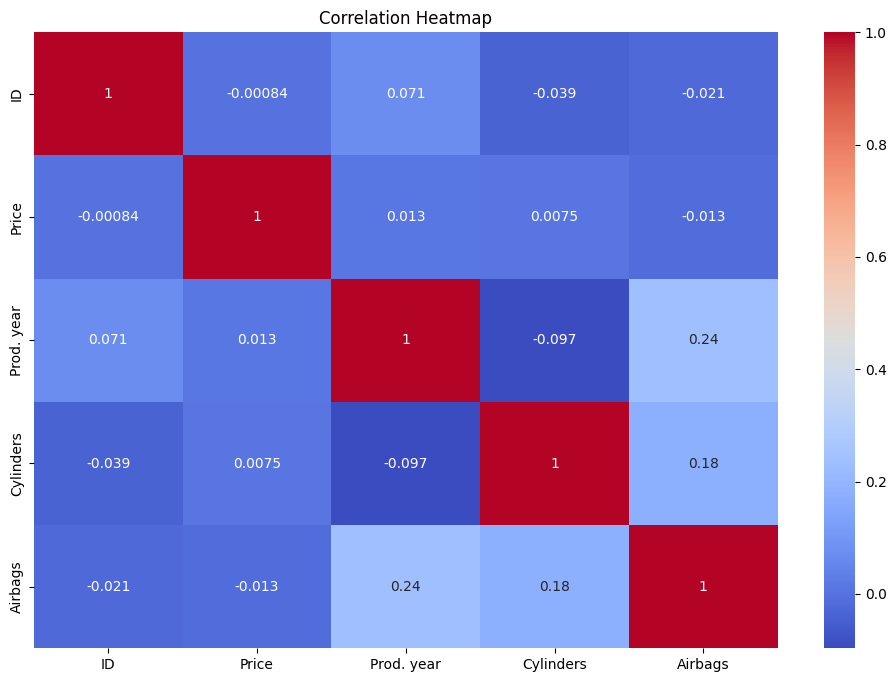

In [ ]:
corr = data.drop('Price', axis=1).corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# slit dataset for traning
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((15389, 10060), (3848, 10060))

In [ ]:
# SelectKBest
k_best = SelectKBest(score_func=f_regression, k=5)#select top 5
X_train_new = k_best.fit_transform(X_train, Y_train)
X_test_new = k_best.transform(X_test)

In [ ]:
# Train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_new, Y_train)


RandomForestRegressor(random_state=42)

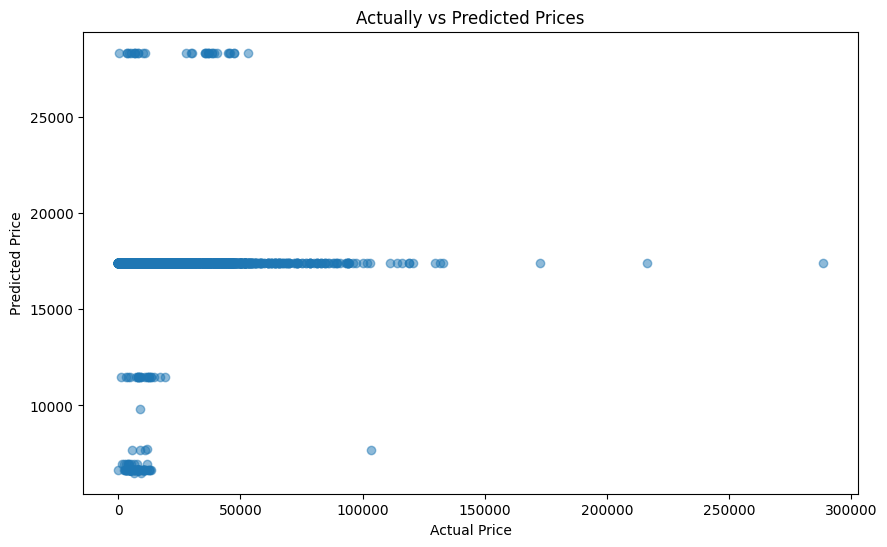

In [ ]:
# Predection
Y_prediction = model.predict(X_test_new)

# comapre actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_prediction, alpha = 0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actually vs Predicted Prices")
plt.show()

In [ ]:
# Model evaluate
Mean_Squared_Error = mean_squared_error(Y_test, Y_prediction )
print(f"Mean Squared Error: {Mean_Squared_Error}")

Mean Squared Error: 308837545.0290209


In [ ]:
# GET THE INDEX
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Manufacturer_OPEL', 'Model_Combo', 'Category_Goods wagon',
       'Engine volume_1.7', 'Mileage_99999 km'],
      dtype='object')


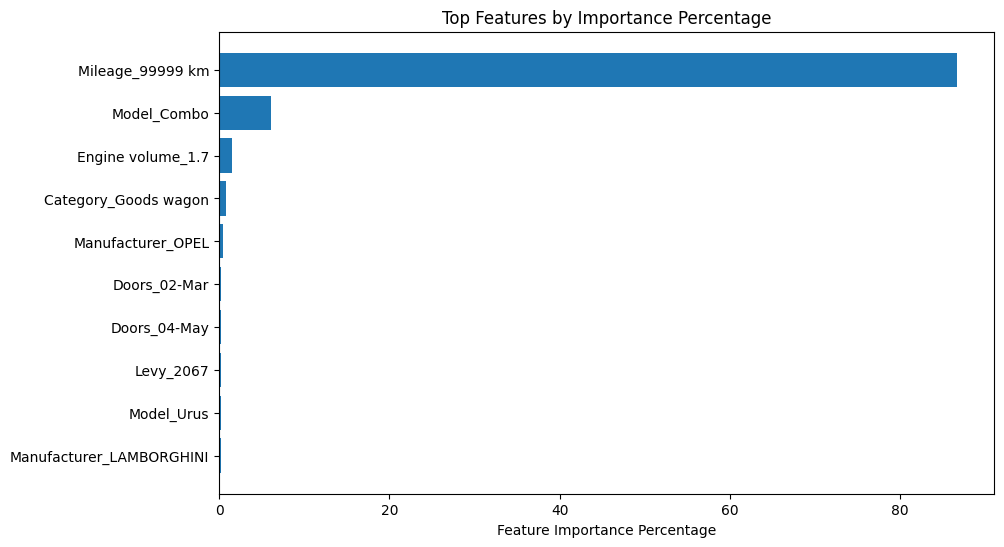

In [ ]:
# Get the feature scores and feature names
feature_scores = k_best.scores_
feature_names = X_train.columns

# Calculate the percentage of feature importance
total_score = feature_scores.sum()
feature_importance_percentage = (feature_scores / total_score) * 100

# Sort the features by their importance percentages
sorted_indices = np.argsort(feature_importance_percentage)[:: -1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_percentages = feature_importance_percentage[sorted_indices]

# Plot the top features and their importance percentages
num_features_to_plot = 10  # You can change this to the number of features you want to display
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:num_features_to_plot], sorted_percentages[:num_features_to_plot])
plt.xlabel("Feature Importance Percentage")
plt.title("Top Features by Importance Percentage")
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()